In [1]:
#Pretty Display of Variables
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#%autoreload

# Import libraries

In [3]:
from plot_projections import plot_all_projections, plot_final_projections, plot_point_for_couple, plot_projection_up_down, plot_border
from prop_info import extreme_points, vect_blade, d_blade, center_prop
from get_segments import blade_alone, get_segments_points, get_planes
from major_axis import get_major_axis
#from projections import couple_all_planes, project_all_couples, projections_by_side, project_couple
from new_projections import get_all_points_for_projections, projection_one_plane
from parameters import get_hub_points, get_hub_radius
from plot_param import plot_hub
from plot_prop import plot_pointcloud, plot_direction, plot_segments
from myMathFunction import least_squares, point_on_plane
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

# Pre-processing

In [4]:
propeller_coords = pd.read_csv('aerostar_data.csv')
propeller_coords.shape

(151986, 3)

In [5]:
propeller_coords = propeller_coords.drop_duplicates(subset=None, keep='first', inplace=False)
propeller_coords = propeller_coords.reset_index(drop=True)

In [6]:
max_point, min_point, middle_point, highest_point, lowest_point = extreme_points(propeller_coords)

vect_length = vect_blade(max_point, min_point) 

dmiddle, dhighest, dlowest = d_blade(vect_length, middle_point, highest_point, lowest_point)

upper_blade, lower_blade = blade_alone(propeller_coords, vect_length, dmiddle)

vect_out, vect_side, hub_inner_radius = get_major_axis(propeller_coords, middle_point, vect_length)

# Projections

In [7]:
nb_seg = 3
resolution = 3
nb_points = 100

planes = get_planes(upper_blade, dmiddle, dhighest, vect_length, nb_seg)
segments = get_segments_points(upper_blade, planes, nb_seg)
#plot_segments(segments)

up, down = get_all_points_for_projections(planes, segments, nb_seg, resolution)

In [8]:
up1 = up[0]
dn1 = down[0]
plan1 = planes[0]
#print(up1.shape)

In [9]:
popt_right, popt_left, right_projection_points, left_projection_points = projection_one_plane(up1, dn1, plan1, nb_points)

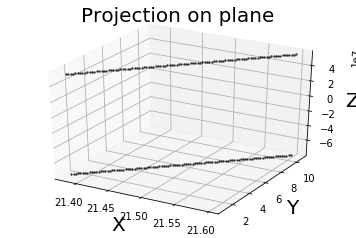

In [12]:
plot_projection_up_down(right_projection_points, left_projection_points)

# Find parameters

    - Tip radius 
        Projection dans le sens de la longueur et ... ??
    - Blade twist 
        Project on planes as in projection
        Compute difference of angle between main directions of projections (PCA possible)

### Hub radius

In [ ]:
hub_points = get_hub_points(propeller_coords, dmiddle, vect_length)

hub_outer_radius, hub_inner_radius = get_hub_radius(hub_points, middle_point, vect_side)

hub_radius = hub_outer_radius[2] - middle_point[2]  #from center to exterior radius

In [ ]:
plot_hub(propeller_coords, hub_points, hub_outer_radius, hub_inner_radius)

### Chord length

In [ ]:
chord_length = np.linalg.norm(highest_point - middle_point) - hub_radius
chord_length

### Blade twist

### Tip radius